# Getting Started With GeoPandas

This notebook serves as a starter guide or template for doing geographical analysis using the GeoPandas library. 

The dataset we will be using in this tutorial is from Analyze Boston. Analyze Boston is the City of Boston’s data hub and is a great resource for data sets regarding the city.

We will be working with two datasets. First is the 2020 CENSUS TRACTS IN BOSTON dataset, and second is the WICKED FREE WIFI LOCATIONS dataset. The first dataset contains the geographical boundaries of each census tract in Boston, and the second dataset contains the geographical location of each free wifi location in Boston.

https://data.boston.gov/dataset/wicked-free-wifi-locations

https://data.boston.gov/dataset/2020-census-tracts-in-boston1/resource/0eb72f57-7226-4552-b8e1-a76b6b142bc3

In [1]:
# Start by importing the necessary packages
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon

# for visualizations : 
import seaborn as sns
import matplotlib.pyplot as plt

When working with geographical data, .shp files are the most common format. These files are often accompanied by other files with the same name but different extensions. For example, a .shp file might be accompanied by a .dbf, .prj, .shx, and .cpg file. These files are all necessary for the .shp file to work properly.

In [2]:
# read in the census data
census = gpd.read_file('data/Census2020_BlockGroups.shp')
census.head()

,OBJECTID,STATEFP20,COUNTYFP20,TRACTCE20,BLKGRPCE20,GEOID20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,Shape_STAr,Shape_STLe,geometry
0,1,25,025,040600,1,250250406001,Block Group 1,G5030,S,1265377.0,413598.0,+42.3833695,-071.0707743,1.807118e+07,29256.866068,"POLYGON ((769378.692 2964626.314, 769385.078 2..."
1,2,25,025,051101,1,250250511011,Block Group 1,G5030,S,220626.0,0.0,+42.3882285,-071.0046816,2.374654e+06,9142.174252,"POLYGON ((788317.786 2966115.262, 788838.563 2..."
2,3,25,025,051101,4,250250511014,Block Group 4,G5030,S,227071.0,270.0,+42.3913407,-071.0020343,2.446949e+06,11579.546171,"POLYGON ((789538.125 2967889.427, 789539.214 2..."
3,4,25,025,981600,1,250259816001,Block Group 1,G5030,S,586981.0,158777.0,+42.3886205,-070.9934424,8.026752e+06,16626.718823,"POLYGON ((790938.417 2966482.118, 790974.619 2..."
4,5,25,025,010204,3,250250102043,Block Group 3,G5030,S,145888.0,0.0,+42.3459611,-071.1020344,1.570220e+06,5510.560013,"POLYGON ((762928.668 2951612.031, 763063.607 2..."


What makes a .shp file unique is the "geometry" column. The geometry column typically contains the coordinates or geometric properties of the features represented in the shapefile, such as points, lines, or polygons. For us, each row in our shapefile represents one census block group, and the geometry column stores a vectorized polygon boundaries of each block group that lets us see a visual representation of the block group.

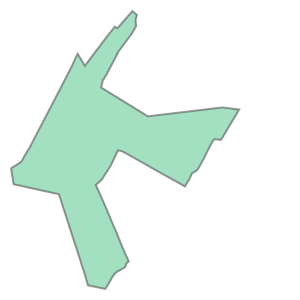

In [3]:
census['geometry'][0]

We can plot all of these block groups together to get a visual representation of the city of Boston.

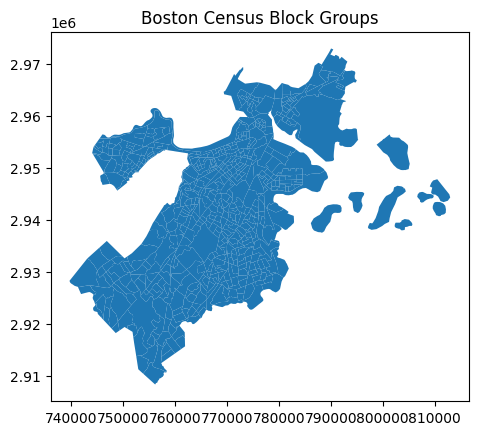

In [4]:
census.plot()
plt.title('Boston Census Block Groups')
plt.show()

Now let's read in our Wicked Free Wifi Locations shapefile

In [5]:
# read in the wifi locations shapefile
wfw = gpd.read_file('wifi/Wicked_Free_WiFi_Locations.shp')
wfw

,neighborho,neighbor_1,device_ser,device_con,device_add,device_lat,device_lon,device_tag,etl_update,is_current,org1,org2,inside_out,landmark,ObjectId,geometry
0,N_568579452955534204,Dorchester,Q2CK-H48M-P2E9,DOT-BFD21-AP3,"641 Columbia Rd., Dorchester, MA",42.318336,-71.063236,BFD Engine-21 Outside,2023-06-12,1,BFD,NaN,Outside,Engine 21,1,POINT (-7910723.209 5208784.596)
1,N_568579452955537848,South Boston,Q2CK-LEG8-FAFN,SB-HIGHSCHOOL-AP2,"95 G St., South Boston, MA",42.332869,-71.044891,recently-added,2023-06-12,1,NaN,NaN,NaN,NaN,2,POINT (-7908681.044 5210972.710)
2,N_568579452955538316,Hyde Park,Q2CK-NERF-4JX7,HP-BPDE18-AP2,"1249 Hyde Park Ave., Hyde Park, MA",42.256473,-71.124219,recently-added,2023-06-12,1,NaN,NaN,NaN,NaN,3,POINT (-7917511.803 5199475.676)
3,N_579275502070532581,Roxbury,Q2CK-DSFT-7HTL,ROX-TROTTER-AP3,"Humbolt & Waumbeck St., Roxbury, MA",42.313249,-71.089180,BPS Outside Trotter-School,2023-06-12,1,BPS,NaN,Outside,Trotter School,4,POINT (-7913611.287 5208018.690)
4,N_579275502070532581,Roxbury,Q2CK-2D9P-VKGR,ROX-BFDE42-AP1,"1870 Columbus Ave., Roxbury, MA",42.318412,-71.097758,BFD Engine-42 Outside,2023-06-12,1,BFD,NaN,Outside,Engine 42,5,POINT (-7914566.172 5208795.947)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,N_568579452955534204,Dorchester,Q2CK-G9M2-VTK4,DOT-BFD21-AP2,"641 Columbia Rd., Dorchester, MA",42.318336,-71.063236,BFD Engine-21 Outside,2023-06-12,1,BFD,NaN,Outside,Engine 21,256,POINT (-7910723.209 5208784.596)
256,N_568579452955527921,Parks,Q2CK-MP93-YDN3,PARKS-COMMONEAST-AP1,"139 Tremont St, Boston, MA 02111",42.355436,-71.063827,Boston-Common,2023-06-12,1,NaN,NaN,NaN,Boston Common,257,POINT (-7910789.066 5214371.556)
257,L_601230550253962688,Navy Yard,Q2EK-HAXQ-8XW4,NavyYard-AP2,Navy yard Cambridge,42.373720,-71.053272,NaN,2023-06-12,1,NaN,NaN,NaN,NaN,258,POINT (-7909614.112 5217126.360)
258,N_568579452955534204,Dorchester,Q2CK-NJQU-RB55,DOT-MATHER-AP3,"24 Parrish St, Dorchester",42.308397,-71.061017,recently-added,2023-06-12,1,NaN,NaN,NaN,NaN,259,POINT (-7910476.256 5207288.280)


This time, our geometry column are single POINTs rather than whole POLYGONs, which makes sense because each row represents a single wifi location. After plotting them all together we see just a bunch of dots, which is not very helpful. We can make this plot more useful by adding the census block groups to the plot as well.

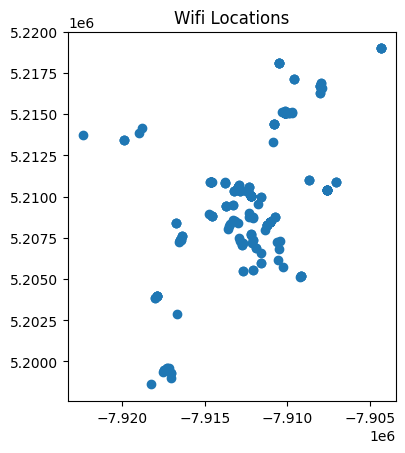

In [6]:
wfw.plot()
plt.title('Wifi Locations')
plt.show()

## Data Cleaning

In [8]:
print(census.shape)

print(wfw.shape)

(581, 16)
(260, 16)


In [76]:
census.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    581 non-null    int64   
 1   STATEFP20   581 non-null    object  
 2   COUNTYFP20  581 non-null    object  
 3   TRACTCE20   581 non-null    object  
 4   BLKGRPCE20  581 non-null    object  
 5   GEOID20     581 non-null    object  
 6   NAMELSAD20  581 non-null    object  
 7   MTFCC20     581 non-null    object  
 8   FUNCSTAT20  581 non-null    object  
 9   ALAND20     581 non-null    float64 
 10  AWATER20    581 non-null    float64 
 11  INTPTLAT20  581 non-null    object  
 12  INTPTLON20  581 non-null    object  
 13  Shape_STAr  581 non-null    float64 
 14  Shape_STLe  581 non-null    float64 
 15  geometry    581 non-null    geometry
dtypes: float64(4), geometry(1), int64(1), object(10)
memory usage: 72.8+ KB


In [77]:
wfw.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   neighborho  260 non-null    object  
 1   neighbor_1  260 non-null    object  
 2   device_ser  260 non-null    object  
 3   device_con  250 non-null    object  
 4   device_add  245 non-null    object  
 5   device_lat  248 non-null    float64 
 6   device_lon  248 non-null    float64 
 7   device_tag  215 non-null    object  
 8   etl_update  260 non-null    object  
 9   is_current  260 non-null    int64   
 10  org1        119 non-null    object  
 11  org2        5 non-null      object  
 12  inside_out  162 non-null    object  
 13  landmark    168 non-null    object  
 14  ObjectId    260 non-null    int64   
 15  geometry    248 non-null    geometry
dtypes: float64(2), geometry(1), int64(2), object(11)
memory usage: 32.6+ KB


Doesn't look like there's much to clean in the census data, but in the wifi dataset let's just drop the organization columns because they contain the most nulls, and we don't need them for our analysis.

In [9]:
wfw.drop(['org1', 'org2'], axis=1, inplace=True)

## Showing the wifi locations on our census block group map

So we can see a map of Boston and a map of dots representing wifi locations separately, but how do I overlay these dots on top of the map of Boston to actuall see where in Boston these wifi locations are? First, check that the Coordinate Reference Systems (CRS) of both geodataframes are the same. The CRS specifies the coordinate system and reference frame used to define the spatial positions of the features represented in the file, and in order to overlay two geodataframes, they must have the same CRS.

In [10]:
# Check the CRS of both GeoDataFrames
print("Census CRS: ", census.crs)
print("Wifi CRS: ", wfw.crs)

Census CRS:  PROJCS["NAD83 / Massachusetts Mainland (ftUS)",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",41],PARAMETER["central_meridian",-71.5],PARAMETER["standard_parallel_1",41.7166666666667],PARAMETER["standard_parallel_2",42.6833333333333],PARAMETER["false_easting",656166.666666667],PARAMETER["false_northing",2460625],UNIT["US survey foot",0.304800609601219,AUTHORITY["EPSG","9003"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Wifi CRS:  EPSG:3857


Since they're different, we need to use the to_crs method to make sure they're all in the same coordinate system. We'll use the EPSG:4326 coordinate system, which is one of the most common coordinate systems for geographical data. Then, we can overlay the two plots using matplotlib.

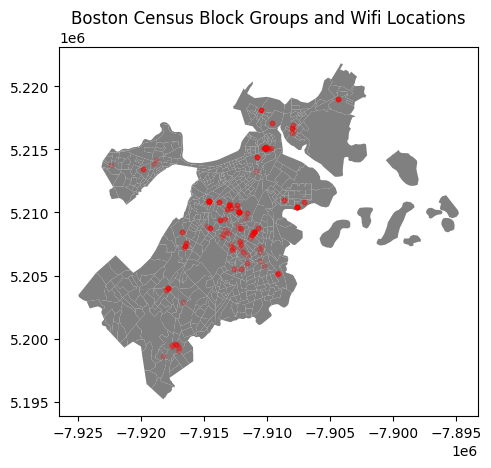

In [11]:
# If they're different, reproject the wifi data to match the census data
if census.crs != wfw.crs:
    census = census.to_crs(wfw.crs)

# Create a new figure and axis
fig, ax = plt.subplots(1, 1)

# Plot the census data
census.plot(ax=ax, color='gray')

# Plot the wifi locations
wfw.plot(ax=ax, color='red', markersize=10, alpha=0.2)

plt.title("Boston Census Block Groups and Wifi Locations")
plt.show()

If you want to zoom in on a specific area of a map in GeoPandas, you need to add the lines: plt.xlim() and plt.ylim(). These functions take in the xmin and xmax, and ymin and ymax values of the area you want to zoom in on. You can find these values by looking at the x and y axes of the original plot.

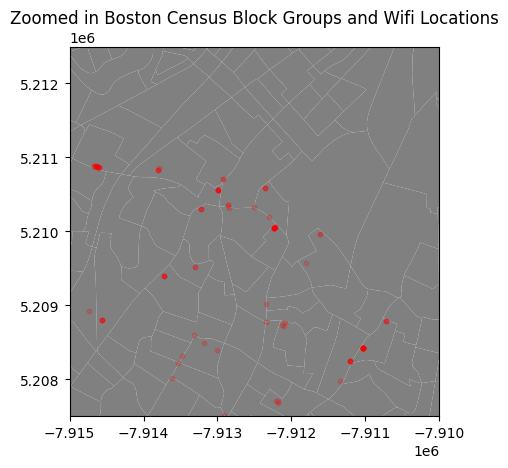

In [12]:
# Same as before
if census.crs != wfw.crs:
    census = census.to_crs(wfw.crs)
fig, ax = plt.subplots(1, 1)
census.plot(ax=ax, color='gray')
wfw.plot(ax=ax, color='red', markersize=10, alpha=0.2)
plt.title("Zoomed in Boston Census Block Groups and Wifi Locations")


# Set the x and y limits to zoom in on Boston
plt.xlim([-7.915e6, -7.91e6])  # xmin and xmax
plt.ylim([5.2075e6, 5.2125e6])  # ymin and ymax

plt.show()

## Make a Choropleth (color each census block according to the number of WiFi locations in it):


Now that both of our GeoDataFrames are on the same CRS, we can do a spatial join to find out how many WiFi locations are in each census tract. A spatial join is a type of join that merges two GeoDataFrames based on the spatial relationship between the geometries of the two GeoDataFrames. In this case, we want to know how many WiFi locations are in each census tract, so we will use the contains operation to find all of the WiFi locations that are within each census tract.



In [13]:
# Perform a spatial join between the census tracts and WiFi locations
wifi_per_tract = gpd.sjoin(census, wfw, predicate='contains').groupby('TRACTCE20').size()
wifi_per_tract.head()

TRACTCE20
000301     1
000603     3
000604     1
000805     1
030302    35
dtype: int64

The "contains" operation (as well as other spatial operations like "intersects", "within", etc.) uses geometric calculations based on the shapes' coordinates (which have the same CRS) to determine spatial relationships.

For the "contains" operation specifically, it checks if all points of the other geometric object are within the current geometric object, and that their boundaries do not coincide.

For example:

In [14]:
from shapely.geometry import Point, Polygon

# Create a 5x5 square (tract)
polygon = Polygon([(0, 0), (5, 0), (5, 5), (0, 5)])

# Create two points (WiFi location)
point1 = Point(3, 3)  # Inside the polygon
point2 = Point(6, 6)  # Outside the polygon

# Check containment
print(polygon.contains(point1))
print(polygon.contains(point2))  


True
False


We can now groupby the unique 'TRACTCE20' values and take .size() to get the number of wifi locations in each tract. Then, we can merge this with our census dataframe to get a new column with the number of wifi locations in each census tract.

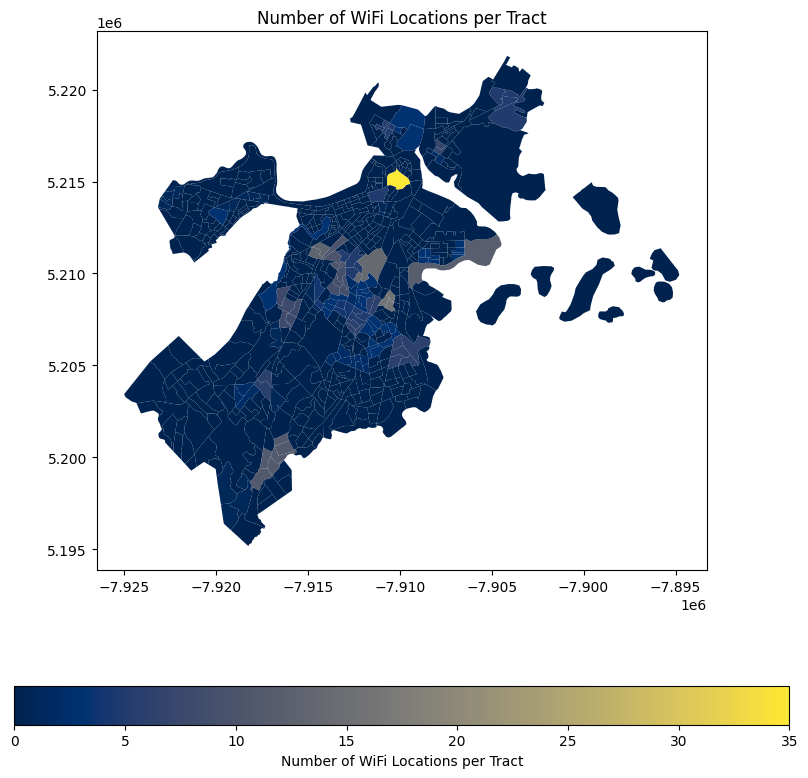

In [15]:
# Add a new column to the census GeoDataFrame with the count of WiFi locations per tract
census = census.merge(wifi_per_tract.rename('wifi_count'), how='left', left_on='TRACTCE20', right_index=True)

# Replace NaN values (tracts without any WiFi location) with 0
census['wifi_count'].fillna(0, inplace=True)

# Now, create a new figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the census data, color-coded by the number of WiFi locations
census.plot(column='wifi_count', ax=ax, legend=True, cmap='cividis', 
            legend_kwds={'label': "Number of WiFi Locations per Tract",
                         'orientation': "horizontal"})

plt.title("Number of WiFi Locations per Tract")
plt.show()


In [16]:
census[census['wifi_count'] == census['wifi_count'].max()]['wifi_count']

478    35.0
Name: wifi_count, dtype: float64

Looks like there's 35 free wifi locations in this bright yellow tract, maybe the 'landmarks' column will tell us why...

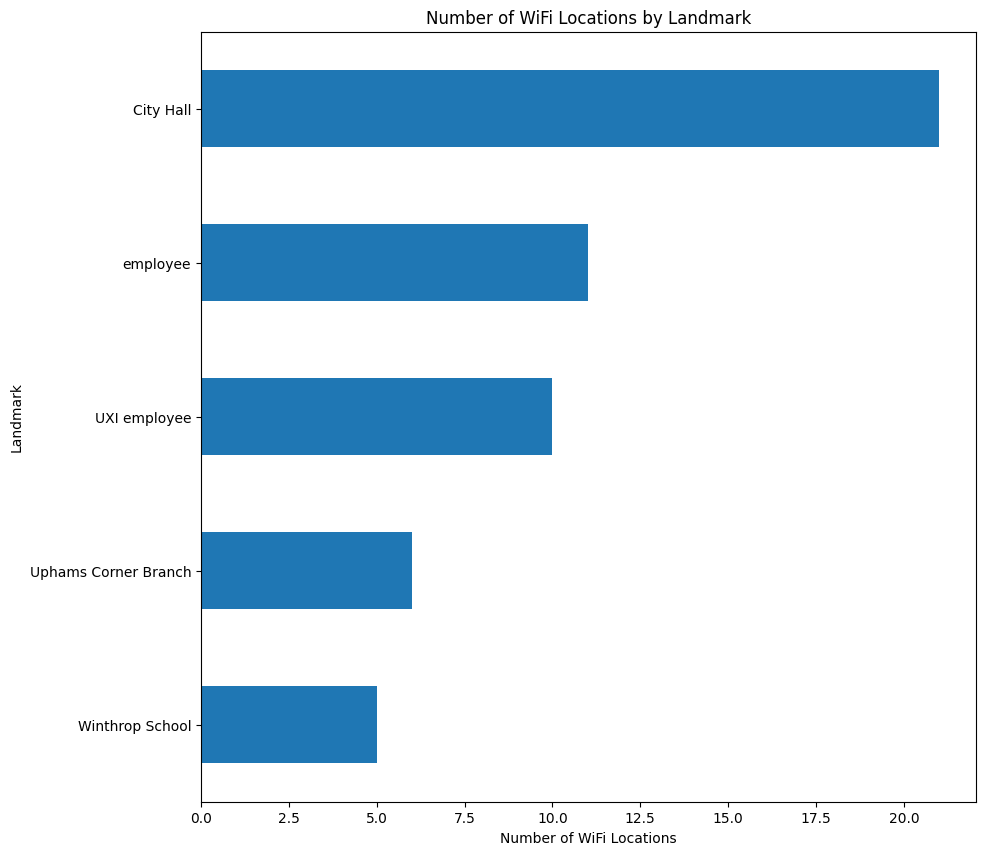

In [17]:
wfw['landmark'].value_counts().head(5).sort_values().plot(kind='barh', figsize=(10, 10))
plt.title('Number of WiFi Locations by Landmark')
plt.xlabel('Number of WiFi Locations')
plt.ylabel('Landmark')
plt.show()

So it could be the City Hall, let's graph it! 

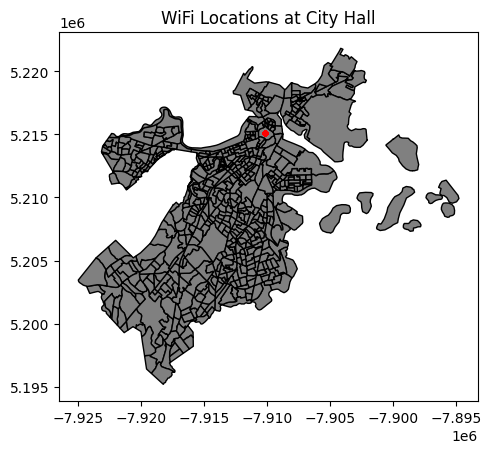

In [18]:
city_hall_wifi = wfw[wfw['landmark'] == 'City Hall']

if census.crs != city_hall_wifi.crs:
    city_hall_wifi = city_hall_wifi.to_crs(census.crs)

fig, ax = plt.subplots()
census.plot(ax=ax, color='grey', edgecolor='black')
city_hall_wifi.plot(ax=ax, color='red', markersize=10)
plt.title('WiFi Locations at City Hall')
plt.show()

Looks like we're right! After plotting the subset of our dataframe where Landmark == "City Hall", we can see that all of these points are clustered in that bright yellow census tract. Looking at the listed address of these WiFi locations, we can see that they are all located at 1 City Hall Square, which is the address of Boston City Hall.

Here are the unique device addresses of these city hall wifi locations:

In [19]:
city_hall_wifi['device_add'].unique()

array(['1 City Hall Square, Boston, MA 02201',
       '1 City Hall Plaza, Pavilion\nBoston, MA  02201',
       'One City Hall Sq, Pavilion Bldg\nBoston, MA 02201', nan,
       '1 City Hall Plaza, \nBoston, MA  02201',
       'One City Hall Sq, Pavilion Bld, IWF Room,\nBoston, MA 02201'],
      dtype=object)

## Inside vs Outside Wifi locations

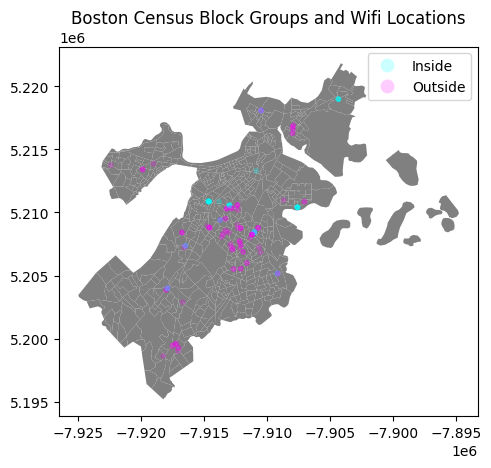

In [20]:
fig, ax = plt.subplots(1, 1)

census.plot(ax=ax, color='gray')

# Plot the wifi locations with color based on "inside_out" column
wfw.plot(ax=ax, column='inside_out', cmap='cool', markersize=10, legend=True, alpha=0.2)

plt.title("Boston Census Block Groups and Wifi Locations")
plt.show()


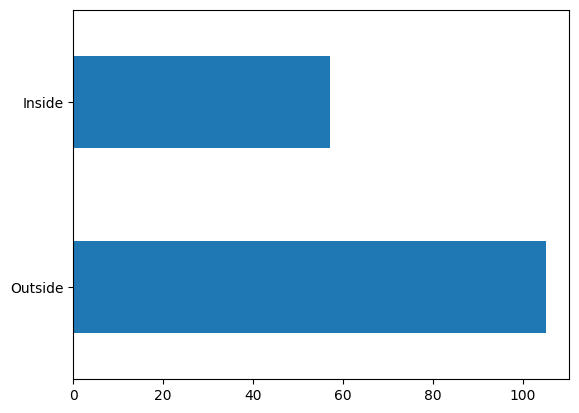

In [21]:
wfw['inside_out'].value_counts().plot(kind='barh')
plt.show()

Looks like most of our WiFi locations are outside. There's probably a lot of "regular" EDA that can be done here, but since this is a GeoPandas/geographical analysis notebook, we'll just leave it at that. 

## Closest Wifi location to BU

In [22]:
from geopy.distance import geodesic

# Coordinates of Boston University (accordign to Google)
BU_latitude = 42.3505
BU_longitude = -71.1054

# Create a copy of the WiFi locations and drop rows with missing coordinates
wfw = wfw.copy()
wfw.dropna(subset=['device_lat', 'device_lon'], inplace=True)


# Function to calculate distances to BU
def calculate_distance(row):
    point = (row['device_lat'], row['device_lon'])
    return geodesic(point, (BU_latitude, BU_longitude)).miles

wfw['distance_to_BU'] = wfw.apply(calculate_distance, axis=1)

# Find the WiFi location with the minimum distance
wfw[wfw['distance_to_BU'] == min(wfw['distance_to_BU'])]


,neighborho,neighbor_1,device_ser,device_con,device_add,device_lat,device_lon,device_tag,etl_update,is_current,inside_out,landmark,ObjectId,geometry,distance_to_BU
36,N_601230550253961587,BCYF Tremont,Q2FD-4SE4-JW2S,BCYF-3rd FL GED,"1483 Tremont St, Boston, MA",42.332317,-71.09865,BCYF Inside employee,2023-06-12,1,Inside,employee,37,POINT (-7914665.525 5210889.576),1.301774


In order to find the closest wifi location to BU, we need to find the distance between each wifi location and BU. We can do this using the geodesic function from geopy, which returns the distance between two longitudes/latitudes. Then, we can find the row where the distance is the smallest, which will be the closest wifi location to BU.

The closest wifi location to BU is the one at 1483 Tremont St, Boston, MA. It's about 1.3 miles away from BU. Let's plot it!


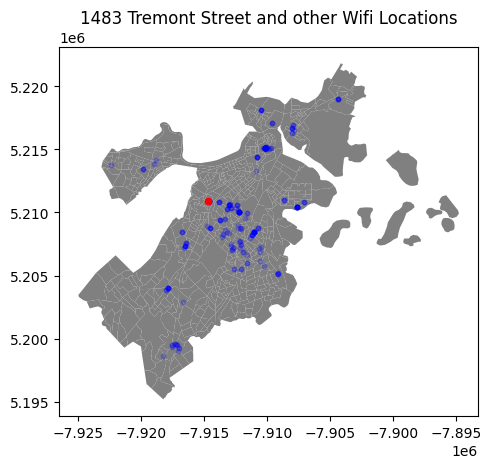

In [23]:
fig, ax = plt.subplots(1, 1)

# Plot the census data
census.plot(ax=ax, color='gray')

# Plot the wifi locations
wfw.plot(ax=ax, color='blue', markersize=10, alpha=0.2)

# Plot the WiFi location closest to BU in red
wfw.query("device_ser == 'Q2FD-4SE4-JW2S'").plot(ax=ax, color='red', markersize=20)
plt.title("1483 Tremont Street and other Wifi Locations")
plt.show()

## Wrap Up, Next Steps

There's a lot more you can do with these datasets, for example, you could try finding the average distance between wifi locations, or incorporate another dataset with demographic information and try to find a relationship between income, education level, population density, etc and wifi locations. but this notebook should serve as a good starting point for your geographical analysis. 

Click [here](https://drive.google.com/drive/u/1/folders/1J5-9x_gEDeJ2rbuRw-kMlnE4GsZjbJN1) to download this Jupyter Notebook (make sure you are signed in with your BU email)!